# Part I - Ford GoBike System Data
## by Lama

## Introduction

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.



## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load the data
Data=pd.read_csv('fordgobike-tripdata.csv')

In [3]:
Data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
#Check the columns that have missing values.
Data.isna().any()

duration_sec               False
start_time                 False
end_time                   False
start_station_id            True
start_station_name          True
start_station_latitude     False
start_station_longitude    False
end_station_id              True
end_station_name            True
end_station_latitude       False
end_station_longitude      False
bike_id                    False
user_type                  False
member_birth_year           True
member_gender               True
bike_share_for_all_trip    False
dtype: bool

In [6]:
#Check whether there are any duplicate Values.
sum(Data.duplicated())

0

# Clean Data

In [7]:
cleanedData=Data.copy()

In [8]:
#Drop missing values
cleanedData.dropna(inplace=True)

In [9]:
def convert_to_datetime(Data, start_col='start_time', end_col='end_time'):

    Data[start_col] = pd.to_datetime(Data[start_col])
    Data[end_col] = pd.to_datetime(Data[end_col])
    return Data


In [14]:
cleanedData = convert_to_datetime(cleanedData)

In [10]:
#Change the type of member_birth_year to int
cleanedData['member_birth_year'] = cleanedData['member_birth_year'].astype('Int64')

I handle missing values by dropping rows with nulls and converting start_time, end_time, and member_birth_year to appropriate data types.

In [17]:
cleanedData.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


### What is the structure of your dataset?

> The dataset contains information about bike trips. It consists of 183,412 rows and 16 columns.

### What is/are the main feature(s) of interest in your dataset?

> duration: The duration of the trip 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> user_type: The type of user (Subscriber or Customer).
bike_share_for_all_trip: Whether the bike share program was used for the whole trip. And member_birth_year

## Univariate Exploration


In [12]:
sns.set_palette('mako')

### What is the distribution of trip duration among users? 

In [13]:
# Convert trip duration from seconds to minutes
cleanedData['duration_min'] = cleanedData['duration_sec'] / 60

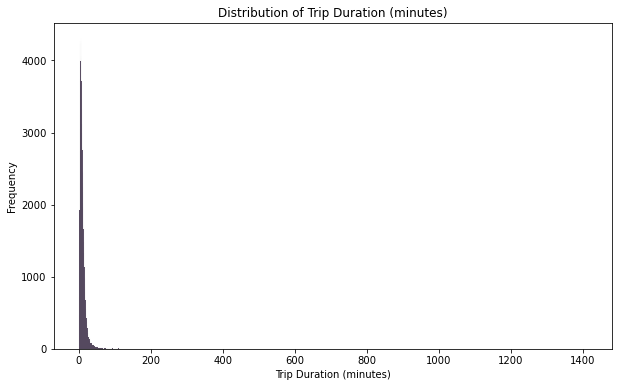

In [14]:

plt.figure(figsize=(10,6))
sns.histplot(data=cleanedData, x='duration_min')

# Add title and labels
plt.title('Distribution of Trip Duration (minutes)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')


plt.show()



 The distribution is highly right-skewed, meaning that while most trips are short, there are a few very long trips that pull the distribution tail to the right.

### How are trips distributed between different user types (Subscriber vs. Customer)?

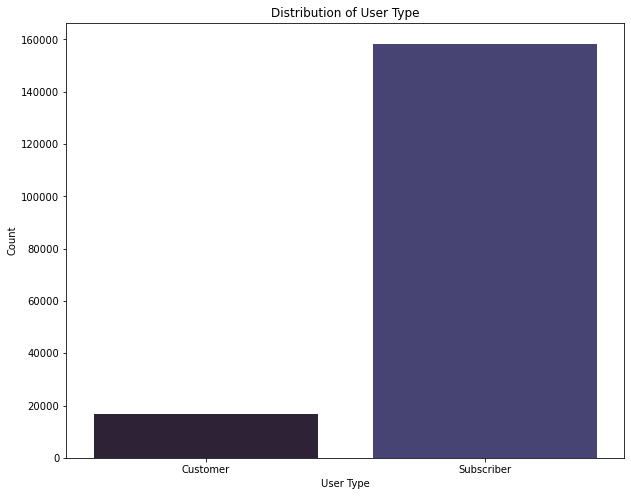

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(data=cleanedData, x='user_type')

plt.title('Distribution of User Type')
plt.xlabel('User Type')
plt.ylabel('Count')

plt.show()

Subscribers make significantly more trips compared to Customers.

### What is the distribution of bike-sharing users by member_birth_year

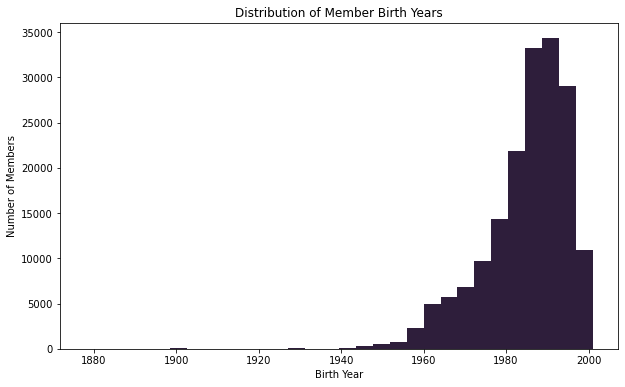

In [16]:
plt.figure(figsize=(10, 6))

plt.hist(cleanedData['member_birth_year'], bins=30)
plt.title('Distribution of Member Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Number of Members')

plt.show()


The histogram of member birth years shows that the majority of users were born between 1980 and 2000, with a concentration around the mid-1980s. This suggests that most users are in their 20s to 40s, which aligns with a younger, more active population likely to use bike-sharing services.

### Question: How are trips distributed across different starting stations?

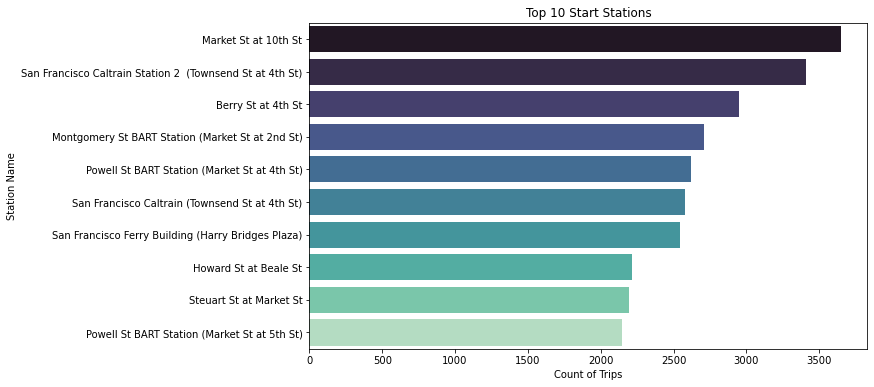

In [17]:
plt.figure(figsize=(10,6))
top_stations = cleanedData['start_station_name'].value_counts().nlargest(10)
sns.barplot(x=top_stations, y=top_stations.index,palette='mako')

plt.title('Top 10 Start Stations')
plt.xlabel('Count of Trips')
plt.ylabel('Station Name')

plt.show()


Market St at 10th St leading the way with approximately 3,500 trips. This is followed closely by San Francisco Caltrain Station 2 (Townsend St at 4th St) with around 3,000 trips. Other stations like Berry St at 4th St and Montgomery St BART Station also show significant activity but with slightly fewer trips.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Trip durations are primarily short, typically between 5 to 15 minutes, and exhibit a right-skewed distribution. The user type data showed a clear majority of subscribers. Birth years typically focus on younger to middle-aged adults. Start stations have varied traffic, with some emerging as key hubs due to higher activity write this again.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The trip duration data exhibited a right-skewed distribution with some very long trips that appeared as outliers.

## Bivariate Exploration



### Are younger users more likely to take short or long trips compared to older users?


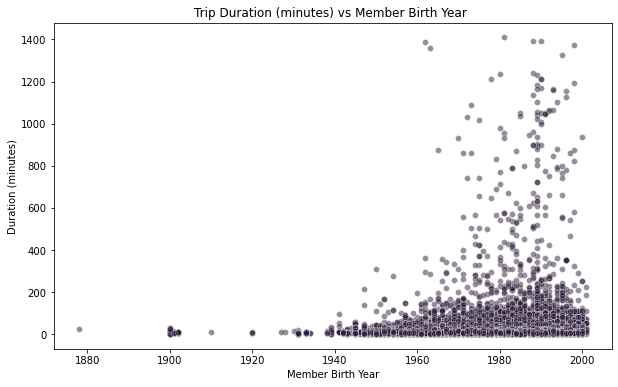

In [18]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='member_birth_year', y='duration_min',  data=cleanedData, alpha=0.5)
plt.title('Trip Duration (minutes) vs Member Birth Year ')
plt.xlabel('Member Birth Year')
plt.ylabel('Duration (minutes)')
plt.show()


i can observe that most trips fall within the shorter duration range, with some outliers for longer trips.
Older and younger users exhibit greater variability in trip duration compared to middle-aged users, which could suggest different usage patterns based on age groups.

### What could explain the shorter and more consistent trip durations among Subscribers compared to Customers?

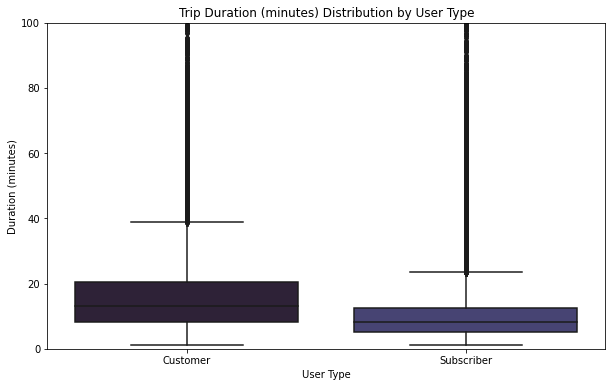

In [19]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='user_type', y='duration_min', data=cleanedData)
plt.title('Trip Duration (minutes) Distribution by User Type')
plt.xlabel('User Type')
plt.ylabel('Duration (minutes)')
plt.ylim(0, 100) 
plt.show()


Subscribers generally have shorter and more consistent trip durations, with most trips under 20 minutes.
Customers show a wider range of trip durations, with many longer trips. 

### How does the usage of bike share for all trips differ between Customers and Subscribers?

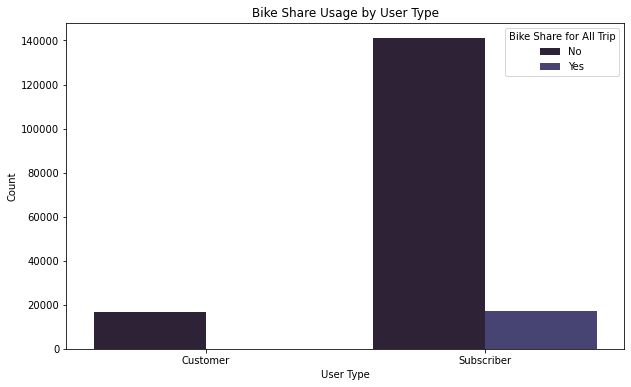

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='user_type', hue='bike_share_for_all_trip', data=cleanedData)
plt.title('Bike Share Usage by User Type')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.legend(title='Bike Share for All Trip')
plt.show()

Subscribers tend to use the bike share for all trips more frequently than Customers.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscribers tend to have shorter and more consistent trip durations, with most trips lasting under 20 minutes. In contrast, Customers exhibit a wider range of trip durations, with many outliers indicating longer trips. This suggests that Subscribers likely use the bike share service for more routine, shorter commutes, while Customers might be using it for occasional or leisure trips that can take longer.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Older users (born before the 1960s) and younger users (born after 1980) tend to have more variation in their trip durations. Older users seem to take shorter, more routine trips, while younger users exhibit a higher number of longer trips.

## Multivariate Exploration


### How does trip duration vary with member birth year, and how does this relationship differ between Customers and Subscribers?

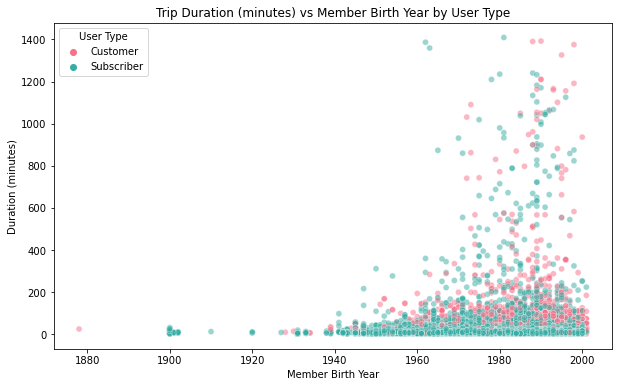

In [21]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='member_birth_year', y='duration_min', hue='user_type',palette='husl', data=cleanedData, alpha=0.5)
plt.title('Trip Duration (minutes) vs Member Birth Year by User Type')
plt.xlabel('Member Birth Year')
plt.ylabel('Duration (minutes)')
plt.legend(title='User Type')
plt.show()


The plot shows that both Customers and Subscribers tend to have shorter trip durations as the birth year increases, with most trips concentrated below 200 minutes for users born after 1980. However, there are more instances of longer trips among older Customers compared to Subscribers. This suggests that older users, particularly Customers, may be using the bike share service for longer, potentially more leisure-oriented trips

### How does trip duration vary by start hour for Subscribers and Customers?

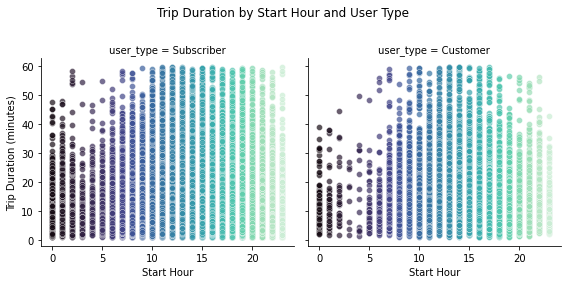

In [22]:

# Convert start_time to start_hour
cleanedData['start_hour'] = cleanedData['start_time'].dt.hour

cleanedData_filtered = cleanedData[cleanedData['duration_min'] < 60]

g = sns.FacetGrid(data=cleanedData_filtered, col='user_type', hue='start_hour', palette='mako', height=4, col_wrap=2)
g.map(sns.scatterplot, 'start_hour', 'duration_min', alpha=0.7)

g.set_axis_labels('Start Hour', 'Trip Duration (minutes)')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Trip Duration by Start Hour and User Type')

plt.show()


The plot shows that Subscribers tend to have more evenly distributed trip durations throughout the day, with a noticeable concentration of trips during morning and afternoon hours, likely corresponding to commuting times. Trip durations for Subscribers remain fairly consistent across hours, rarely exceeding 60 minutes.

In contrast, Customers show a wider spread of trip durations, with fewer trips during early morning hours and an increase in longer trips (some exceeding 50 minutes) during late morning and afternoon hours. 


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Subscribers take shorter, consistent trips, peaking during commute times. Customers have longer, more varied trips, suggesting leisure use. Younger users, especially subscribers, take shorter trips, while older customers' trips vary more.


### Were there any interesting or surprising interactions between features?

> Nope

## Conclusions
>In Conclusion, Subscribers primarily use the service for short, consistent commutes during peak hours, while customers engage in longer, more varied trips, likely for leisure or occasional purposes.  
Age also plays a role, with older customers and younger subscribers exhibiting the longest and shortest trips

